# Analyse des métriques proposées pas les stagiaires (spoiler : on peut mieux faire)

## Analyse de la loss

## Analyse de la précision :
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cette metrique est souvent la première montrée dans tous les projets d'apprentissage. Si on prend l'exemple d'un classificateur de photo chat/chien, la précision représente le pourcentage de photo reconnue comme chat et qui sont effectivement des félins (\#teamchat) et le nombre de photos chien et qui sont effectivement des canidés. Dans le cadre d'un algorithme multi classe la précision n'est simplement que la moyenne des précisions de toutes les classes. Dans notre cas nous avons donc 88,3% des intentions qui sont bien attribuée dans leur classes. Ce chiffre est plutôt élevé et donc de prime abord il semble que le modèle soit bon. Mais ne nous laissons pas avoir. Quid de l'état pour chaque classe. Y a t il des disparité ? Le dataset est il équilibré ? Sans cette information capitale la précision ne vaut pas grand chose (si on a 90% d'image de chien dans un dataset et que je suis un algorithme qui répond tout le temps chien lorsque je vois une image, ma précision vaudra 90%, trop fort). Avec cet exemple on voit bien que sans visualisation préalable des données cette valeur élevée ne vaut pas grand chose.

## Analyse du recall 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Que signifie recall ? Rappel ! Le recall est en fait le pourcentage d'intention correctement classée par rapport au total d'intention qui appartiennent à la classe. Pour un système multi-classe, là encore, le recall correspond à la moyenne de recall de chaque classe. Cette donnée est très importante et va de pair avec la précision précédemment étudiée. Par exemple si on reprend l'exemple précédemment énoncé (l'algorithme qui ne dit que chien), on remarque que l'on aura alors un recall de 100\% pour la classe chien mais un recall de 0\% pour la classe chat. En moyennant (la moyenne n'est d'ailleurs peut être pas la meilleure chose à faire ici, notez l'ouverture vers un point qui sera **développé plus bas**)on obtient un recall de 50\%. Ce chiffre désastreux contraste fortement avec son homologue 90\% et nous montre bien toute l'importance du recall quant à la démonstration de la qualité du modèle. Le recall fourni par le README fait état d'une valeur de 66\% ce qui est assez bas et qui est bien différent des 88\% de précision. On peut donc en déduire que certaines classes doivent donc être moins bien traitée que d'autre. Mais alors (reprise de l'ouverture) il faudrait afficher le recall propre à chaque à classe et vérifier l'équilibre des données (en fait le dataset est très déséquilibré, 66\% des données sont classifiées irrelevant ce qui rend très probable l'hypothèse de lacune dans certaines classes). 
    

## Analyse de la métrique F1

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Le recall et la précision ont la même importance dans le calcul du $F_{1}$. Ce score va avoir le rôle de synthétiser à la fois les valeurs de recall et de précision. Cet indicateur peut être intéressant. Cependant dans notre cas on a vu que le recall avait beaucoup plus d'importance que la précision. Ainsi cet indicateur va donc nous donner une aide plutôt limitée mais qui est qui est là quand même. On pourrait donc utiliser une autre valeur pour le beta du fbeta score, qui refleterait l'importance que l'on accorde au recall. Il s'agirait alors d'une metric encore plus pertinente vu le déséquilibre du dataset (66% du volume des données est dans la classe *irrelevant*)

# Analyses et visualisations manquantes

## Analyses manquantes:
Nous avons listé plusieurs analyses qui pourraient nous aider à mieux évaluer notre modèle :
1. Utiliser un $F_{2}$ score plutôt qu'un $F_{1}$ score?
    * Ce score correspondrait à un compromis entre le recall et la précision. Cependant l'avantage du $F_{2}$ sur le $F_{1}$ est qu'il met plus en lumière la partie recall. Ainsi on mettrait donc en avant un chiffre qui résume grossièrement les performances du modèles sur des métriques qui sont plus intéressantes pour notre problème.

2. Un tableau présentant le recall pour chaque classe et la précision pour chaque classe
    * Ce tableau permettrait de repérer les classes à problèmes. On a vu dans notre analyse en haut que le recall moyen n'était pas très bon, et on en avait déduit qu'il y avait certainement certaines classe qui posaient problème. Grâce à ces tableaux nous pourrions repérer explicitement ces classes.
    * Dans le cadre d'une démonstration de fonctionnement cette metrics montre au client que le produit n'alloue pas moins d'importance à certaine classe (il n'est pas très fort sur une partie des classe ce qui lui permet d'avoir une bonne moyenne, alors qu'il est proche du  niveau 0 sur d'autres classes).

3. Une matrice de confusion
    * Cette matrice permettrait pour chaque classe de représenter les réponses données par l'algorithme en comparaison avec les résultats attendus pour chaque classes. Il serait alors intéressant d'étudier d'éventuelles disparités dans les classes (imaginons l'exemple où 80\% des *find-train* sont classés dans *irrelevant*). Ce travail permettrait d'approfondir les résultats obtenus avec la méthode précédente (on se focaliserai sur les classes repérées grâce à leur recall insuffisant)
    
4. Une courbe AUC-ROC
    * L'un des objectifs est d'obtenir le meilleur coefficient de threshold possible. Pour ce faire une courbe montrant l'évolution du taux de Vrai positif par rapport au taux de Faux positif serait quelque chose qui pourrait être idoine. C'est justement le rôle de la courbe AUC-ROC. Cette métrique permettrait donc pour le développeur de choisir le meilleur threshold possible, mais aussi de prouver l'efficacité de son seuillage. Il montrerait que le seuillage n'est pas trop fort (trop d'intent classé comme irrelevant) ni trop faible (trop d'intent classés dans des cases ne correpondant pas mais différentes d'irrelevant). Dans le cadre de l'exercice avoir un seuil bien posé est donc quelque chose de vital et critique pour l'application. En effet le client veut un algorithme qui puisse aider le plus possible l'utilisateur, mais il a aussi préciser qu'il veut éviter les redirections vers de mauvais formulaire, préférant un irrelevant à un mauvais formulaire. Bien placé, le threshold revient donc à équilibrer à la fois l'aide à l'utilisateur et l'évitement d'envoi de formulaire innaproprié.

5. La métrique Cleymevin (invention)
    * Cette métrique permettrait de pousser un peu plus loin l'analyse proposée par le courbe AUC-ROC. Cette métrique mesurerait en fait pour chaque classe le nombre de réponse qui ont amené la génération d'un mauvais formulaire. Cette métrique répond directement à la problématique énoncé par le client (à savoir éviter la génération d'un mauvais formulaire, quitte à faire appel à un opérateur humain). Elle permet de mettre sous silence les irrelevant qui "gênent" moins dans expérience utilisateur.

<!-- Matrice de confusion
-> Matrice des recalls et des précisions
-> Courbe AUC-ROC
-> fbeta avec beta > 1  => f2 score -->

## Visualisations manquantes

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analyser et étudier les données sur lesquelles sont réalisées les tests est vital pour la bonne réalisation du projet. Pour pouvoir comprendre comment ces données fonctionne il est possible d'ajouter la mesure dun nombre d'utérrance. Ce nombre indiquerait la taille de données sur laquelle l'algorithme s'entraîne. Cela permettrait de donner une bonne indication sur le degré de précision pouvant être atteint par l'algorithme sur chaque classe (on aura pas les mêmes attentes si on peut s'entraîner sur 10 000 images ou sur 10).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Le nombre d'utternances par classe est aussi une données qui doit être évaluée. En effet avec le nombre d'utternance on a donc un ordre de grandeur de la taille globale du dataset. Mais comme on l'a vu précédemment, le dataset est assez hétéroclite. Et chacune des classes présente des comportements différents. En lien avec l'analyse du recall il est impérieux de comprendre la taille de chacune des classes. Ainsi on pourra donc s'appesantir sur ses classes en priorités pour vérifier les résultats de l'agent apprenant.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Il pourrait aussi être intéressant d'analyser l'hétérogénéïté des données (est ce que les phrases labellisées *find-hotel* toutes les phrases se ressemblent ou est ce qu'elles représentent plutôt bien la diversité du langage humain). Cependant, dans notre cas cette analyse risque d'être bien compliquée voire impossible (qu'est ce qui sémantiquement différencie deux phrases, changer un mot peut dans certains cas changer tout le sens et dans d'autre cas n'avoir aucune influence). Dans le cadre de l'exercice on va donc supposer que les datasets inter classe ont été bien construit par les linguiste pour offrir une diversité naturelle et nécessaire.

-> Répartitions des données (nombre d'utterances par classes, nombres d'utterrances)




In [1]:
import json
from utils.predictions import generate_predictions_dataset

# generate_predictions_dataset(query_dataset_path="data/testing_set.json", save_on_disk=True)

In [2]:
from utils.predictions import stats_by_intent, print_stats_by_intent

with open('data/predict.json', encoding="utf8") as f:
    predictions = json.load(f)
with open('data/testing_set.json', encoding="utf8") as f:
   test_dataset = json.load(f)

stats_intent = stats_by_intent(test_dataset, predictions)
print_stats_by_intent(stats_intent)


       find-train  irrelevant  find-flight  find-restaurant  purchase  \
TP             14         663            7               52        67   
FP              1         176            1                1        18   
TP+FN          21         677           24               93       114   
TP+FP          15         839            8               53        85   

       find-around-me  provide-showtimes  find-hotel  global  
TP                 29                  4          21     857  
FP                  4                  1           6    -857  
TP+FN              67                 14          55       0  
TP+FP              33                  5          27       0  


## Calcul des métriques

classe      Precision      Recall      F2Score
find-around-me   0.43283582089552236      0.8787878787878788      0.7286432160804021      

find-flight   0.2916666666666667      0.875      0.625      

find-hotel   0.38181818181818183      0.7777777777777778      0.6441717791411044      

find-restaurant   0.5591397849462365      0.9811320754716981      0.8524590163934426      

find-train   0.6666666666666666      0.9333333333333333      0.8641975308641975      

irrelevant   0.9793205317577548      0.7902264600715138      0.8219687577485745      

provide-showtimes   0.2857142857142857      0.8      0.5882352941176471      

purchase   0.5877192982456141      0.788235294117647      0.737885462555066      



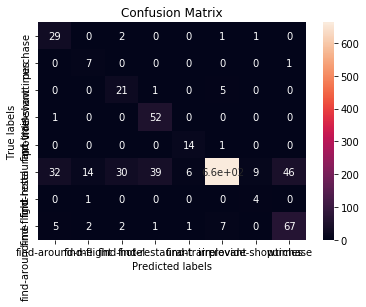

In [19]:
# pour chaque intent (à vérifier) :
# TP = statsByIntent[intent]["detectedCorrect"]
# FP = statsByIntent[intent]["detectedTotal"] - statsByIntent[intent]["detectedCorrect"]
# TP + FN = statsByIntent[intent]["trueCount"]
# precision = TP / (TP + FP)
# recall =  TP / (TP + FN)
import sklearn.metrics
import seaborn as sns
import numpy as np
import matplotlib
from utils.predictions import get_detected_intent

def compute_scores(y_pred,y_true,lst_classe) :
    scores = sklearn.metrics.precision_recall_fscore_support(y_pred, y_true, beta = 2, labels = lst_classe,average=None)
    print("classe      Precision      Recall      F2Score")
    for i in range(len(lst_classe)) :
        print(lst_classe[i]+'   ',end='')
        print(str(scores[0][i])+'      ',end='')
        print(str(scores[1][i])+'      ',end='')
        print(str(scores[2][i])+'      ',end='')
        print("\n")
    return

def plot_confusion_matrix(y_pred, y_true, lst_classe) :
    cm = sklearn.metrics.confusion_matrix(y_pred, y_true)
    ax = matplotlib.pyplot.subplot()
    sns.heatmap(cm, annot = True, ax=ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(lst_classe)
    lst_classe.reverse()
    ax.yaxis.set_ticklabels(lst_classe)
    return

def compute_roc_auc_curve(lst_classe, pas, y_pred, y_true) :
    dic = {}
    for i in lst_classe :
        dic[i] = [[],[]]
    n_classes = lst_classe
    ind = 0
    
    for threshold in range(0.01,) :
        maxi = 'irrelevant'
        for i in lst_classe :
            dic[i][0].append(0)
            dic[i][1].append(0)
        for l in range(len(y_pred)) :
            lst_predicted = []
            for j in lst_classe :
                if(y_pred[l][j] > threshold) :
                    lst_predicted.append(j)
            for j in lst_predicted :
                if(y_true[l] == j) :
                    dic[j][0][ind] += 1
                else :
                    dic[j][1][ind] += 1
        ind += 1
    for i in lst_classe :
        print((dic[i][0],dic[i][1]))
        dic[i] = [0 if((dic[i][0][j]+dic[i][1][j])==0) else float(dic[i][0][j])/(dic[i][0][j]+dic[i][1][j]) for j in range(len(dic[i][0]))]
        to_plot = [range(1,100,pas),dic[i]]
        print(to_plot)
        sns.lineplot(np.asarray(to_plot))
        #Plus qu'à faire l'affichage des courbes. La fonction Cleymevin devrait pas mal ressembler d'ailleurs

def Cleymevin_curve(lst_classe, pas, y_pred, y_true) :
    dic = {}
    for i in lst_classe :
        dic[i] = [[],[]]
    n_classes = lst_classe
    ind = 0
    for threshold in range(0.01,1,pas) :
        maxi = 'irrelevant'
        for i in lst_classe :
            dic[i][0].append(0)
            dic[i][1].append(0)
        for l in range(len(y_pred)) :
            for j in lst_classe :
                print(y_pred[l])
                if(y_pred[l][j] > threshold) :
                    if(maxi == 'irrelevant' ) :
                        maxi = j
                    if(j == 'irrelevant') :
                        maxi = 'irrelevant'
                        break
                    else :
                        maxi = 'irrelevant'
                        break
            if(y_true[l] == maxi or maxi == 'irrelevant') :
                dic[maxi][0][ind] += 1
            else :
                dic[maxi][1][ind] += 1
        ind += 1
    for i in lst_classe :
        print(i)
        print(dic[i])
        dic[i] = [j[0]/(j[0]+j[1]) for j in dic[i]]
        to_plot = [range(1,100,pas),dic[i]]
        sns.lineplot(to_plot)
        #Plus qu'à faire l'affichage des courbes. La fonction Cleymevin devrait pas mal ressembler d'ailleurs

y_pred = []
y_true = []
y_pred_all = []
lst_classe = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","irrelevant","provide-showtimes","purchase"]
pas = 0.01
for i, query in enumerate(test_dataset):
    y_pred.append(get_detected_intent(predictions[i]))
    y_true.append(query["intent"])
    y_pred_all.append(predictions[i])

compute_scores(y_pred, y_true, lst_classe)
plot_confusion_matrix(y_pred, y_true, lst_classe)
# compute_roc_auc_curve(lst_classe, pas, y_pred_all, y_true)

## Affichage des métriques